In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable
pd.options.display.max_columns = None

In [16]:
df = pd.read_csv("datos/historico_tickets_limpio_pandas.csv", index_col=0)

# Pair Programming EDA II

Usad la librería sidetable para:

1. Explorar los valores nulos.

In [4]:
df.stb.missing()

# no hay nulos

,missing,total,percent
id_ticket,0,97386,0.0
fecha,0,97386,0.0
id_empleado,0,97386,0.0
id_agente,0,97386,0.0
categoría,0,97386,0.0
tipo,0,97386,0.0
severidad,0,97386,0.0
prioridad,0,97386,0.0
días_resolución,0,97386,0.0
satisfacción,0,97386,0.0


2. Explorad la columna de categoría y reportad los resultados solo para aquellas categorías que incluyan el 70% de los datos.

In [5]:
df.sample()

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
14275,SMLTSR-3443114227,2018-01-14,1532,22,Sistema,Solicitud,2 - Normal,2 - Media,9,5,1 semestre,2018,Enero


In [6]:
df.stb.freq(['categoría'], thresh = 70)

# las categorías de sistema y acceso/login forman la mayoría de los datos con un 69.9%

,categoría,count,percent,cumulative_count,cumulative_percent
0,Sistema,38961,40.006777,38961,40.006777
1,Acceso/Login,29165,29.947836,68126,69.954614
2,others,29260,30.045386,97386,100.000000


3. Explorad la columna categoría en relación al tipo de problema, filtrando de nuevo por aquellas categorías que incluyan el 70% de los datos.

In [7]:
df.stb.freq(['categoría', 'tipo'], thresh=70)

# la mayoría de los tickets (67.5%) son de tipo solicitud relacionados con el Sistema, Acceso/Login, y Software.

,categoría,tipo,count,percent,cumulative_count,cumulative_percent
0,Sistema,Solicitud,29225,30.009447,29225,30.009447
1,Acceso/Login,Solicitud,21939,22.527879,51164,52.537326
2,Software,Solicitud,14618,15.010371,65782,67.547697
3,others,others,31604,32.452303,97386,100.000000


4. Haced los mismo para la columna tipo en relación a la columna semestre. En este caso filtrad y mostrad los datos que incluyan el 60% de los datos.

In [11]:
df.stb.freq(['tipo', 'semestre'], thresh=60)

# dentro de este umbral, los tickets mas comunes son de tipo Solicitud durante el segundo semestre, pero forman solo 38.5% de los tickets

,tipo,semestre,count,percent,cumulative_count,cumulative_percent
0,Solicitud,2º semestre,37463,38.468568,37463,38.468568
1,others,others,59923,61.531432,97386,100.000000


5. Por último, realizad este análisis para la columna mes en relación a la columna tipo. Mostrad solo los resultados para las categorías que incluyan el 60% de los datos.

In [12]:
df.stb.freq(['mes', 'tipo'], thresh=60)

# la distribución de tickets por mes es bastante homogenea, aunque vemos que los meses del segundo semestre son los mas 
# frequentes que es consistente con los analisis anteriores. Ademas el tipo mas frequente es siempre Solicitud, que tambien es
# consistente con lo anterior.

,mes,tipo,count,percent,cumulative_count,cumulative_percent
0,Octubre,Solicitud,6378,6.549196,6378,6.549196
1,Agosto,Solicitud,6360,6.530713,12738,13.079909
2,Diciembre,Solicitud,6305,6.474237,19043,19.554145
3,Noviembre,Solicitud,6192,6.358203,25235,25.912349
4,Marzo,Solicitud,6186,6.352042,31421,32.264391
5,Septiembre,Solicitud,6168,6.333559,37589,38.597950
6,Junio,Solicitud,6107,6.270922,43696,44.868872
7,Mayo,Solicitud,6078,6.241143,49774,51.110016
8,Julio,Solicitud,6060,6.222660,55834,57.332676
9,others,others,41552,42.667324,97386,100.000000


6. Vamos a hacer un pequeño análisis de los outliers que podamos encontrar en nuestro conjunto de datos. Para realizar esto deberemos:
    - Quedarnos solo con la columnas que sean númericas en nuestro conjunto de datos.
    - Realizar un box-plot para ver cual de ellas tiene outliers e interpretar como esto nos podría afectar a las conclusiones que extraigamos de nuestros datos.

In [23]:
numericas = df.select_dtypes(include = np.number)
numericas.sample()

,id_empleado,id_agente,días_resolución,satisfacción,año
28225,962,12,6,5,2020


In [24]:
numericas.drop(columns = ['id_empleado', 'id_agente', 'año'], inplace=True, axis=1)

In [19]:
numericas.sample()

,días_resolución,satisfacción,año
9941,1,5,2016


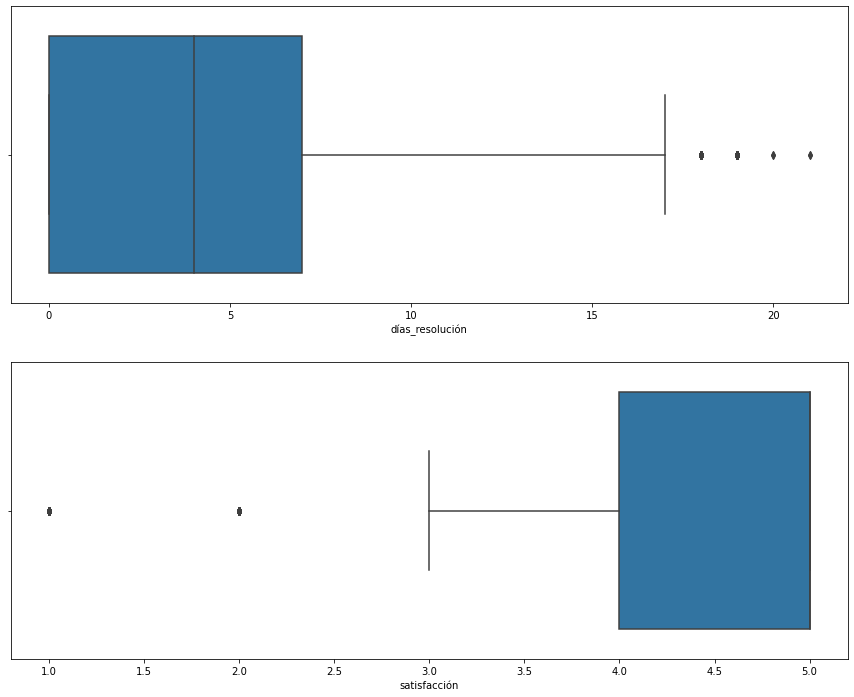

In [26]:
fig, ax = plt.subplots(2,1, figsize=(15,12))

for i in range(len(numericas.columns)):
    sns.boxplot(x=numericas.columns[i], data=df, ax=ax[i])
    
plt.show()


In [27]:
df.shape

(97386, 13)

*La mayoría de los tickets se resuelven dentro de un rango de aproximadamente 0 a 7 días. Hay unos pocos outliers de más de ~17 dias de resolución que podrían sesgar la media hacía la derecha (más alto) aunque la mediana es baja, sobre los 4 días.*

*La mayoría de las notas de satisfacción están comprendidas entre 4 y 5, que se pueden considerar valores altos/buenos. Tenemos unos outliers muy bajos de una nota de 1 o 2, que podrían tirar la media hacia abajo, dependiendo del numero de tickets con esa valoración. En general, podemos concluir que las notas de satisfacción son altos.*